In [1]:
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import wandb
from wandb.keras import WandbCallback
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [31]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [32]:
wandb.init(project="Akhund_Human_Recognition", entity="gharabadiyan")

accuracy,▁▆▇▇▇██▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▂▁▁
val_accuracy,▅▇█▁▆▆▆▄▆▄
val_loss,▂▁▂█▃▄▂▃▁▅
accuracy,0.99465
best_epoch,1
best_val_loss,0.21879
epoch,9
loss,0.02093
val_accuracy,0.88043


In [33]:
train_data_path = '/content/drive/MyDrive/Akhund_Human'
width = height = 224
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    brightness_range = (0.6,1.2),
    zoom_range = 0.1,
    shear_range = 0.3,
    rotation_range = 15,
    validation_split = 0.2
)

train_data = idg.flow_from_directory(
    train_data_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = True,
    subset = "training"
)
val_data = idg.flow_from_directory(
    train_data_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = False,
    subset = "validation"
)


Found 374 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [34]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights = 'imagenet',
    input_shape=(width,height,3),
    pooling = 'avg',
)

model = tf.keras.models.Sequential([
        base_model,
        Flatten(),
        Dropout(0.3),
        Dense(128,activation='relu'),
        #Dense(256,activation='relu'),
        Dense(2,activation='softmax')

])

87910968/87910968 [==============================] - 0s 0us/step


In [35]:
for layer in base_model.layers[:-4]:  #freeze layer
  layer.trainable = False


In [36]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [37]:
model.fit(train_data,validation_data=val_data,epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 0.4582 - accuracy: 0.8021

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231029_100607-id7k0rzm/files/model-best)... Done. 0.3s


12/12 [==============================] - 53s 4s/step - loss: 0.4582 - accuracy: 0.8021 - val_loss: 0.2942 - val_accuracy: 0.8804
Epoch 2/10
12/12 [==============================] - 12s 1s/step - loss: 0.2625 - accuracy: 0.8930 - val_loss: 0.4979 - val_accuracy: 0.8261
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 0.2476 - accuracy: 0.9011

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231029_100607-id7k0rzm/files/model-best)... Done. 0.3s


12/12 [==============================] - 43s 4s/step - loss: 0.2476 - accuracy: 0.9011 - val_loss: 0.2857 - val_accuracy: 0.9022
Epoch 4/10
12/12 [==============================] - ETA: 0s - loss: 0.1536 - accuracy: 0.9358

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231029_100607-id7k0rzm/files/model-best)... Done. 0.4s


12/12 [==============================] - 43s 4s/step - loss: 0.1536 - accuracy: 0.9358 - val_loss: 0.2516 - val_accuracy: 0.9348
Epoch 5/10
12/12 [==============================] - ETA: 0s - loss: 0.1439 - accuracy: 0.9519

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231029_100607-id7k0rzm/files/model-best)... Done. 0.4s


12/12 [==============================] - 42s 4s/step - loss: 0.1439 - accuracy: 0.9519 - val_loss: 0.1723 - val_accuracy: 0.9239
Epoch 6/10
12/12 [==============================] - 10s 803ms/step - loss: 0.0945 - accuracy: 0.9626 - val_loss: 0.2366 - val_accuracy: 0.9130
Epoch 7/10
12/12 [==============================] - 11s 950ms/step - loss: 0.1121 - accuracy: 0.9545 - val_loss: 0.2368 - val_accuracy: 0.9130
Epoch 8/10
12/12 [==============================] - 11s 941ms/step - loss: 0.0819 - accuracy: 0.9679 - val_loss: 0.2962 - val_accuracy: 0.9348
Epoch 9/10
12/12 [==============================] - 10s 867ms/step - loss: 0.0956 - accuracy: 0.9626 - val_loss: 0.1826 - val_accuracy: 0.9348
Epoch 10/10
12/12 [==============================] - ETA: 0s - loss: 0.0734 - accuracy: 0.9733

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231029_100607-id7k0rzm/files/model-best)... Done. 0.3s


12/12 [==============================] - 42s 4s/step - loss: 0.0734 - accuracy: 0.9733 - val_loss: 0.1670 - val_accuracy: 0.9348


In [38]:
model.save('Akhund_Human_Recognition.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 567ms/step


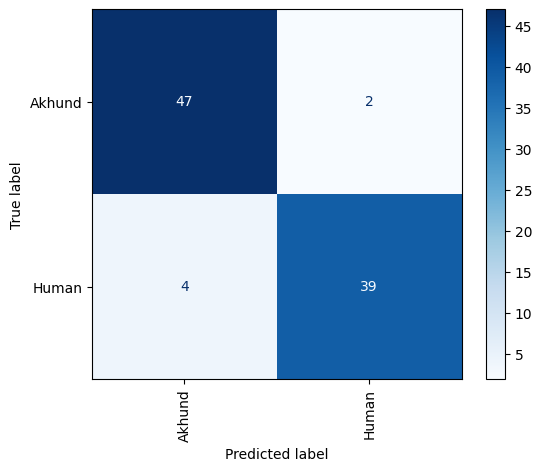

In [41]:
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_data.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Akhund','Human'])
font={'size':'10'}
plt.rc('font',**font)
disp.plot(cmap='Blues',xticks_rotation=90)
plt.show()